In [1]:
!pip install opencv-python

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install tensorflow

In [5]:
!pip install keras

In [6]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
data = pd.read_csv('D:\All Projects\Intern\ML\Task 3\A_Z Handwritten Data.csv')

In [9]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [11]:
data.shape

(372450, 785)

In [12]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [13]:
data.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [14]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [15]:
X = my_data[:,1:]
y = my_data[:,:1]

In [16]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [18]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [19]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


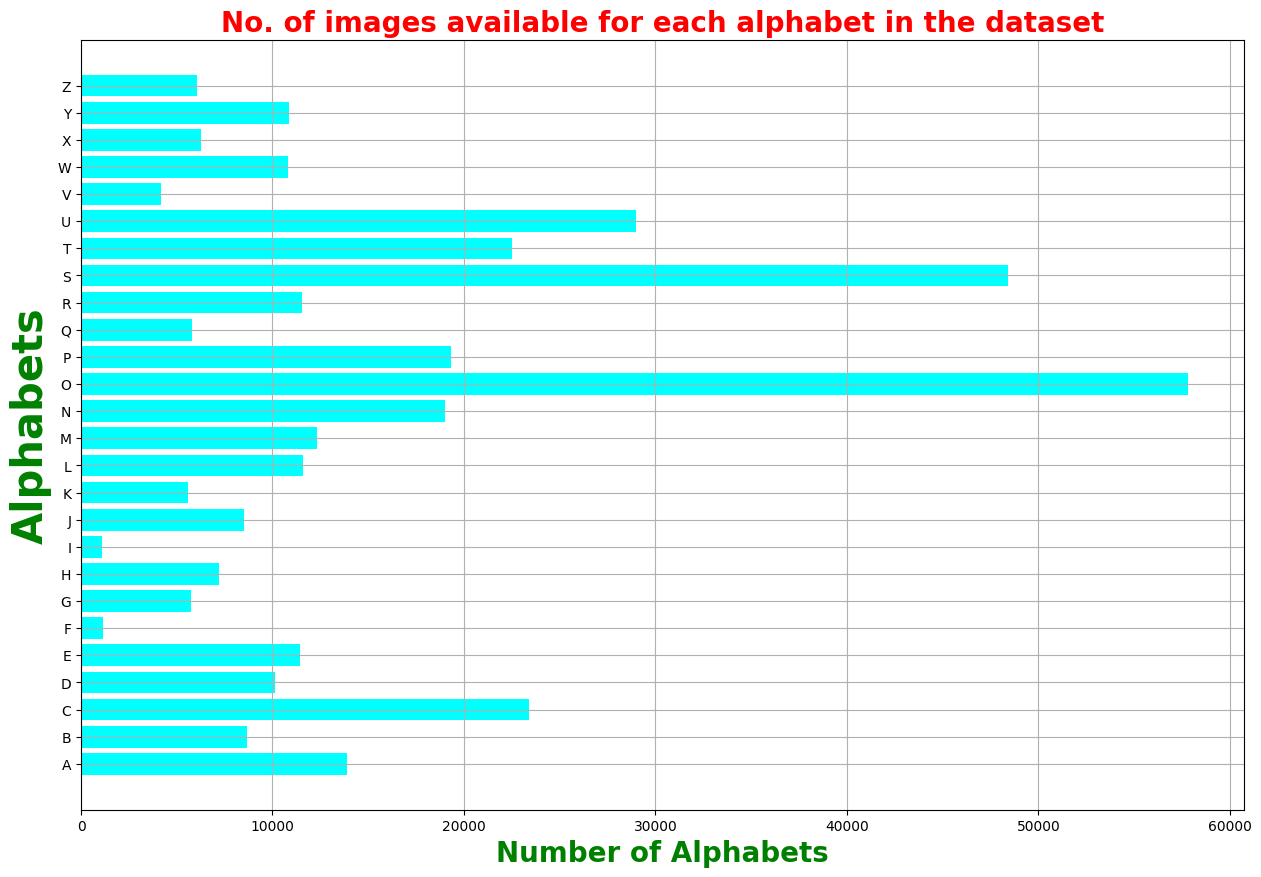

In [20]:
count = np.zeros(26, dtype = 'int') #count list containing all zeroes

for i in y:
    count[i] += 1

alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "cyan")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold',color = 'green')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold',color = 'green')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "red")
plt.grid()
plt.show()

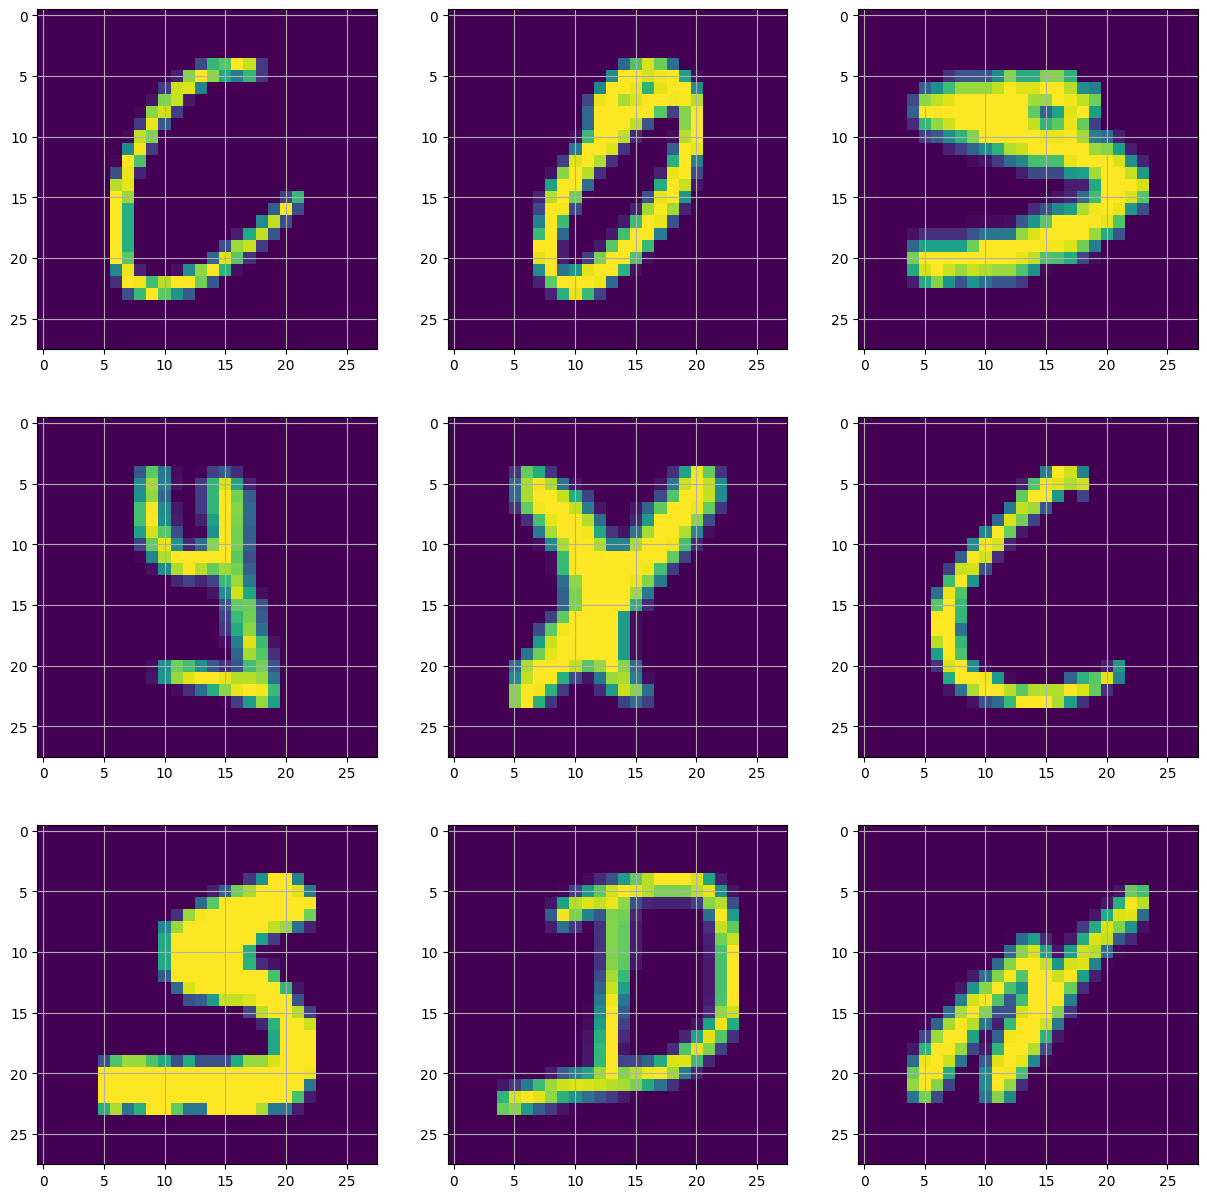

In [21]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [23]:
X_train = X_train/255.
X_test = X_test/255.

In [26]:
def to_categorical_with_dtype(y, num_classes, dtype):
    return np.asarray(to_categorical(y, num_classes=num_classes), dtype=dtype)

categorical_ytrain = to_categorical_with_dtype(y_train, num_classes=26, dtype='int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical_with_dtype(y_test, num_classes=26, dtype='int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [31]:
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

# Original Model Code
model = Sequential()

# First Conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Third Conv2D layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Dense layer 2
model.add(Dense(64, activation='relu'))

# Final layer of 26 nodes
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,282 (657.35 KB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# EarlyStopping callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)

# ModelCheckpoint callback with .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [34]:

history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6838 - loss: 1.0808
Epoch 1: val_accuracy improved from -inf to 0.96814, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 157s 17ms/step - accuracy: 0.6838 - loss: 1.0807 - val_accuracy: 0.9681 - val_loss: 0.1101
Epoch 2/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1335
Epoch 2: val_accuracy improved from 0.96814 to 0.97588, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 158s 17ms/step - accuracy: 0.9609 - loss: 0.1335 - val_accuracy: 0.9759 - val_loss: 0.0862
Epoch 3/100
9310/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9726 - loss: 0.0944
Epoch 3: val_accuracy improved from 0.97588 to 0.98126, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 158s 17ms/step - accuracy: 0.9726 - loss: 0.0944 - val_accuracy: 0.9813 - val_loss: 0.0663
Epoch 4/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9770 - loss: 0.0802
Epoch 4: v

In [35]:
model.evaluate(X_test,categorical_ytest)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9876 - loss: 0.0487


[0.04678628221154213, 0.9878910183906555]

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

In [37]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9878910183906555
The training accuracy is : 0.9898107051849365
The validation loss is : 0.04678628221154213
The training loss is : 0.03318847343325615


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


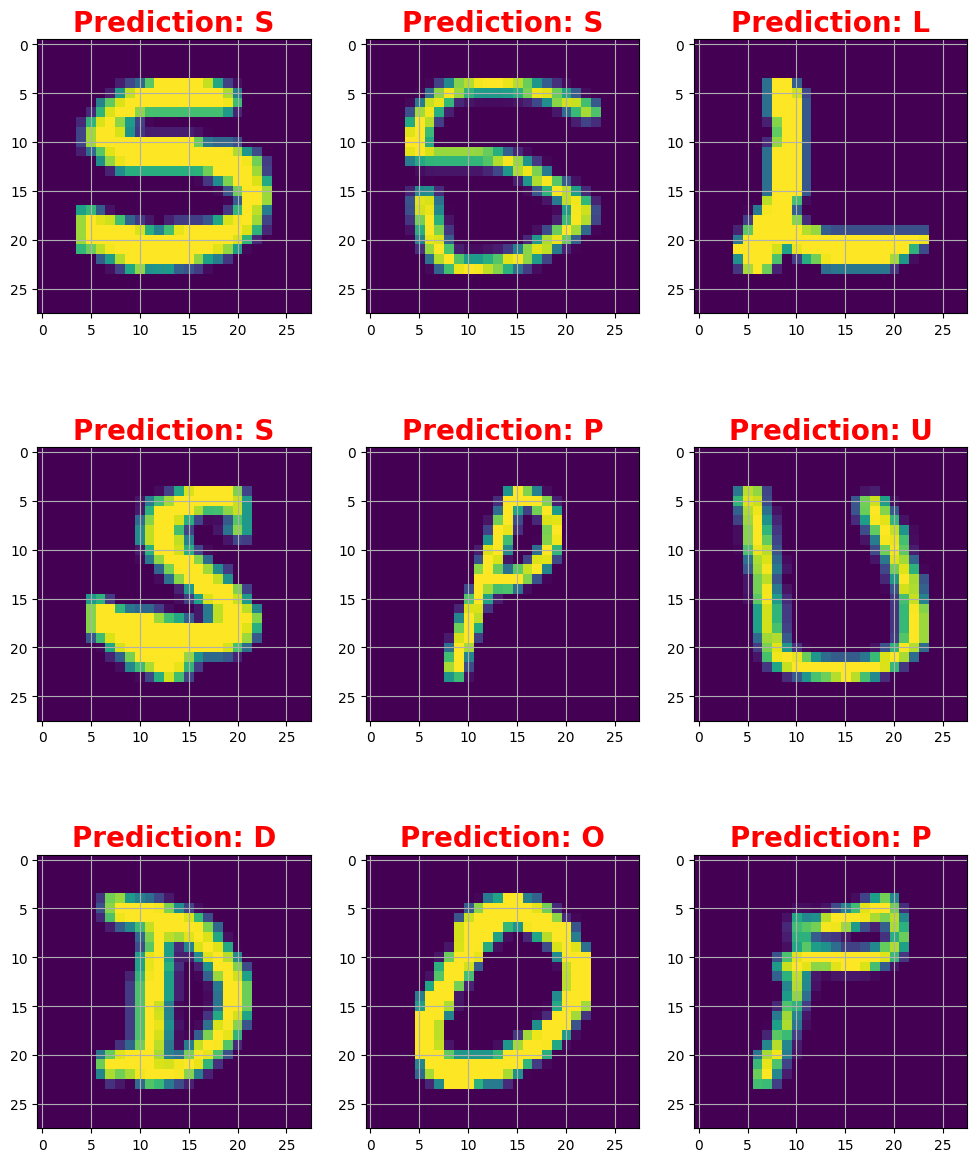

In [38]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])
    
    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()

In [40]:
filename = 'parkmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
model.save('D:\All Projects\Intern\ML\Task 3\hand_character_recognition.keras')

In [45]:
model = tf.keras.models.load_model('D:\All Projects\Intern\ML\Task 3\hand_character_recognition.keras')